In [ ]:
# cek jika telah memakai gpu atau tidak
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


## Arsitektur Transfer Learning VGG16

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import preprocess_input

# Path ke direktori data train, data validasi, dan data uji
vgg16_train7_dir = "/content/drive/MyDrive/Projek_2/Data_Train"
vgg16_valid7_dir = "/content/drive/MyDrive/Projek_2/Data_Validasi"
vgg16_uji7_dir = "/content/drive/MyDrive/Projek_2/Data_Uji"

# Mengatur lebar dan tinggi gambar
img_width = 224
img_height = 224
target_size = (img_width, img_height)

# Batch size
batch_size = 32

# Flow data train, data validasi, dan data uji - dengan augmentasi hanya pada data train
vgg16_train7_datagen = ImageDataGenerator(
    rotation_range=40,
    horizontal_flip=True,
    preprocessing_function=preprocess_input
)

vgg16_valid7_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

vgg16_uji7_datagen = ImageDataGenerator(
)

vgg16_train7 = vgg16_train7_datagen.flow_from_directory(
    vgg16_train7_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    seed=42,
    shuffle=True
)

vgg16_valid7 = vgg16_valid7_datagen.flow_from_directory(
    vgg16_valid7_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    seed=42,
    shuffle=False
)

vgg16_uji7 = vgg16_uji7_datagen.flow_from_directory(
    vgg16_uji7_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    seed=42,
    shuffle=False
)

Found 340 images belonging to 2 classes.
Found 86 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import GlobalMaxPooling2D, Dense, Softmax


# Loading VGG16 model
base7_vgg16_model = VGG16(include_top=False, input_shape=(224,224,3), weights='imagenet')

base7_vgg16_model.trainable = False

# Transfer learning VGG16
model7_vgg16 = tf.keras.models.Sequential([
    base7_vgg16_model,
    GlobalMaxPooling2D(),
    Dense(128, activation="relu"),
    Dense(128, activation="relu"),
    Dense(2, activation="softmax")
])

58889256/58889256 [==============================] - 3s 0us/step


In [ ]:
model7_vgg16.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_max_pooling2d (Glob  (None, 512)               0         
 alMaxPooling2D)                                                 
                                                                 
 dense (Dense)               (None, 128)               65664     
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 2)                 258       
                                                                 
Total params: 14797122 (56.45 MB)
Trainable params: 82434 (322.01 KB)
Non-trainable params: 14714688 (56.13 MB)
__________

In [ ]:
# Compiling model
model7_vgg16.compile(
    loss='binary_crossentropy',
    optimizer='Adam',
    metrics=['accuracy']
  )

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Membuat callback ModelCheckpoint untuk menyimpan model pada epoch terbaik berdasarkan val_loss terendah
# menyimpan model dalam format .h5
model_vgg16_checkpoint = ModelCheckpoint('/content/drive/MyDrive/Projek_2/model_checkpoint/model7_vgg16_GlobalMax_aug.h5', save_best_only=True, monitor='val_loss', mode='min', verbose=1)

# Proses Training
vgg16_hist7 = model7_vgg16.fit(
    vgg16_train7,
    epochs = 200,
    verbose = 1,
    validation_data = vgg16_valid7,
    callbacks=[model_vgg16_checkpoint]

)

Epoch 1/200
11/11 [==============================] - ETA: 0s - loss: 5.2236 - accuracy: 0.6118
Epoch 1: val_loss improved from inf to 2.39514, saving model to /content/drive/MyDrive/Projek_2/model_checkpoint/model7_vgg16_GlobalMax_aug.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 25s 1s/step - loss: 5.2236 - accuracy: 0.6118 - val_loss: 2.3951 - val_accuracy: 0.8023
Epoch 2/200
11/11 [==============================] - ETA: 0s - loss: 1.5063 - accuracy: 0.8294
Epoch 2: val_loss improved from 2.39514 to 1.90854, saving model to /content/drive/MyDrive/Projek_2/model_checkpoint/model7_vgg16_GlobalMax_aug.h5
11/11 [==============================] - 6s 572ms/step - loss: 1.5063 - accuracy: 0.8294 - val_loss: 1.9085 - val_accuracy: 0.8372
Epoch 3/200
11/11 [==============================] - ETA: 0s - loss: 0.7958 - accuracy: 0.9000
Epoch 3: val_loss improved from 1.90854 to 1.36531, saving model to /content/drive/MyDrive/Projek_2/model_checkpoint/model7_vgg16_GlobalMax_aug.h5
11/11 [==============================] - 8s 705ms/step - loss: 0.7958 - accuracy: 0.9000 - val_loss: 1.3653 - val_accuracy: 0.8721
Epoch 4/200
11/11 [==============================] - ETA: 0s - loss: 0.6328 - accuracy: 0.9029
Epoch 4: val_loss did not impr

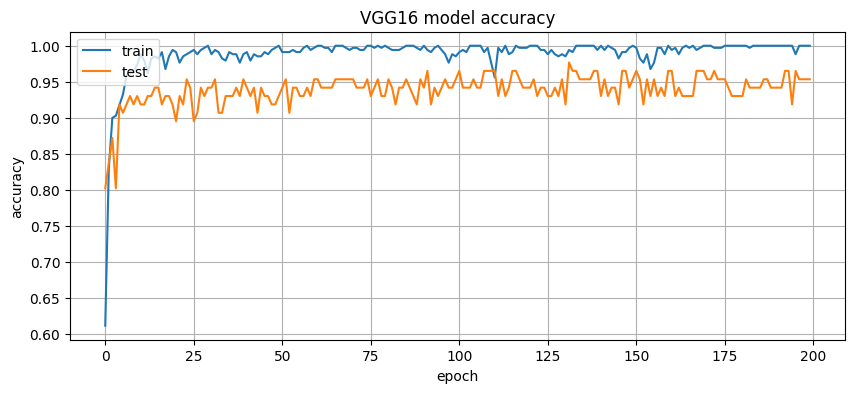

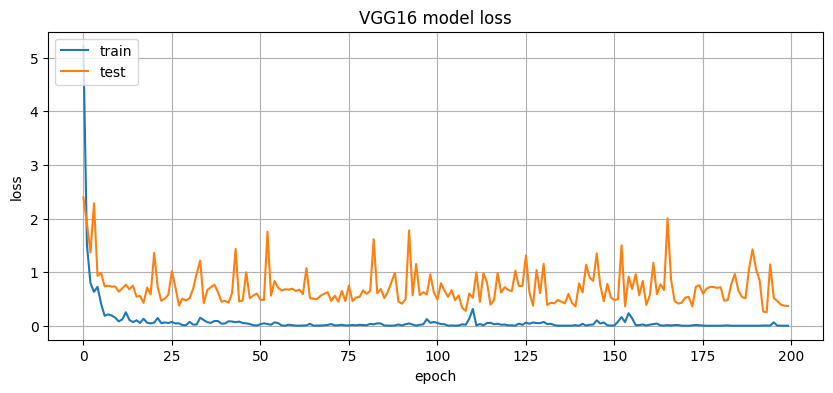

In [ ]:
import matplotlib.pyplot as plt

# Membuat plot akurasi model CNN
plt.figure(figsize=(10,4))
plt.plot(vgg16_hist7.history['accuracy'])
plt.plot(vgg16_hist7.history['val_accuracy'])
plt.title('VGG16 model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

print()

# Membuat plot loss model CNN
plt.figure(figsize=(10,4))
plt.plot(vgg16_hist7.history['loss'])
plt.plot(vgg16_hist7.history['val_loss'])
plt.title('VGG16 model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

In [ ]:
# Setelah pelatihan, memeriksa epoch terbaik (epoch keberapa dan nilai val_loss)
best_val_loss = model_vgg16_checkpoint.best
best_epoch = vgg16_hist7.history['val_loss'].index(best_val_loss) + 1 # +1 karena indeks dimulai dari 0

print(f"Epoch terbaik: {best_epoch}, Val_loss terbaik: {best_val_loss}")

Epoch terbaik: 194, Val_loss terbaik: 0.25195813179016113


### Pengujian Prediksi dengan Model Checkpoint

2/2 [==============================] - 6s 6s/step


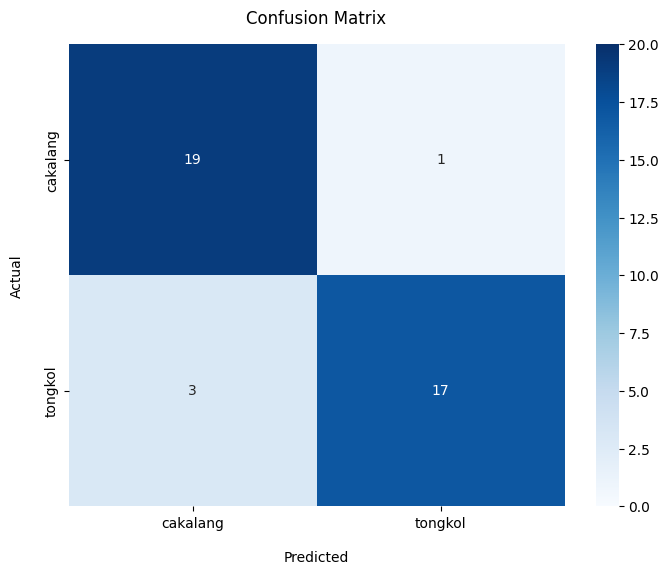

              precision    recall  f1-score   support

    cakalang       0.86      0.95      0.90        20
     tongkol       0.94      0.85      0.89        20

    accuracy                           0.90        40
   macro avg       0.90      0.90      0.90        40
weighted avg       0.90      0.90      0.90        40



In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model

# Muat model checkpoint
model_vgg16_checkpoint = load_model('/content/drive/MyDrive/Projek_2/model_checkpoint/model7_vgg16_GlobalMax_aug.h5')

# Evaluasi model terbaik pada data uji
predictions = model_vgg16_checkpoint.predict(vgg16_uji7)
predicted_classes = np.argmax(predictions, axis=1)

# Label sebenarnya dari dataset uji
true_classes = vgg16_uji7.classes
class_labels = list(vgg16_uji7.class_indices.keys())

# Hitung confusion matrix
confusion_mtx = confusion_matrix(true_classes, predicted_classes)

# Tampilkan confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels, cmap='Blues', vmin=0, vmax=20)
plt.xlabel('Predicted', labelpad=15)
plt.ylabel('Actual', labelpad=15)
plt.title('Confusion Matrix', pad=15)
plt.show()

# Mendapatkan metrik evaluasi
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

### Pengujian Prediksi dengan Model Pelatihan Keseluruhan (200 Epoch)

2/2 [==============================] - 1s 160ms/step


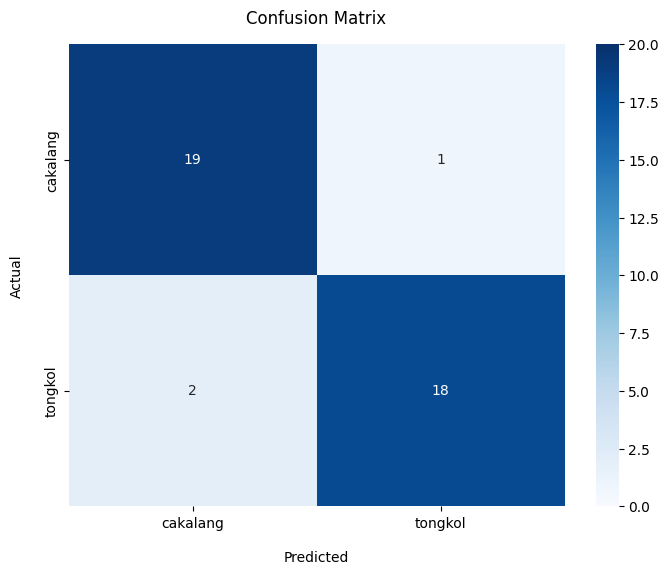

              precision    recall  f1-score   support

    cakalang       0.90      0.95      0.93        20
     tongkol       0.95      0.90      0.92        20

    accuracy                           0.93        40
   macro avg       0.93      0.93      0.92        40
weighted avg       0.93      0.93      0.92        40



In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluasi model pada data uji
predictions = model7_vgg16.predict(vgg16_uji7)
predicted_classes = np.argmax(predictions, axis=1)

# Label sebenarnya dari dataset uji
true_classes = vgg16_uji7.classes
class_labels = list(vgg16_uji7.class_indices.keys())

# Hitung confusion matrix
confusion_mtx = confusion_matrix(true_classes, predicted_classes)

# Tampilkan confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels, cmap='Blues', vmin=0, vmax=20)
plt.xlabel('Predicted', labelpad=15)
plt.ylabel('Actual', labelpad=15)
plt.title('Confusion Matrix', pad=15)
plt.show()

# Mendapatkan metrik evaluasi
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

In [ ]:
# menyimpan model pelatihan keseluruhan (200 epoch) dalam format .h5
model7_vgg16.save("/content/drive/MyDrive/Projek_2/model/model7_vgg16_GlobalMax_aug.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Arsitektur Transfer Learning ResNet50

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import preprocess_input

# Path ke direktori data train, validasi, dan uji
resnet50_train7_dir = "/content/drive/MyDrive/Projek_2/Train"
resnet50_valid7_dir = "/content/drive/MyDrive/Projek_2/Validasi"
resnet50_uji7_dir = "/content/drive/MyDrive/Projek_2/Dataset_Uji"

# Mengatur lebar dan tinggi gambar
img_width = 224
img_height = 224
target_size = (img_width, img_height)

# Batch size
batch_size = 32

# Flow data train, validasi, dan uji - dengan augmentasi hanya pada data train
resnet50_train7_datagen = ImageDataGenerator(
    rotation_range=40,
    horizontal_flip=True,
    preprocessing_function=preprocess_input
)

resnet50_valid7_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

resnet50_uji7_datagen = ImageDataGenerator(
)

resnet50_train7 = resnet50_train7_datagen.flow_from_directory(
    resnet50_train7_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    seed=42,
    shuffle=True
)

resnet50_valid7 = resnet50_valid7_datagen.flow_from_directory(
    resnet50_valid7_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    seed=42,
    shuffle=False
)

resnet50_uji7 = resnet50_uji7_datagen.flow_from_directory(
    resnet50_uji7_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    seed=42,
    shuffle=False
)

Found 340 images belonging to 2 classes.
Found 86 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalMaxPooling2D, Dense, Softmax


# Loading ResNet50 model
base7_resnet50_model = ResNet50(include_top=False, input_shape=(224,224,3), weights='imagenet')

base7_resnet50_model.trainable = False

# Transfer learning ResNet50
model7_resnet50 = tf.keras.models.Sequential([
    base7_resnet50_model,
    GlobalMaxPooling2D(),
    Dense(128, activation="relu"),
    Dense(128, activation="relu"),
    Dense(2, activation="softmax")
])

94765736/94765736 [==============================] - 4s 0us/step


In [ ]:
model7_resnet50.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_max_pooling2d_1 (Gl  (None, 2048)              0         
 obalMaxPooling2D)                                               
                                                                 
 dense_3 (Dense)             (None, 128)               262272    
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 2)                 258       
                                                                 
Total params: 23866754 (91.04 MB)
Trainable params: 279042 (1.06 MB)
Non-trainable params: 23587712 (89.98 MB)
_________

In [ ]:
# Compiling model
model7_resnet50.compile(
    loss='binary_crossentropy',
    optimizer='Adam',
    metrics=['accuracy']
  )

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Membuat callback ModelCheckpoint untuk menyimpan model pada epoch terbaik berdasarkan val_loss terendah
# menyimpan model dalam format .h5
model_resnet50_checkpoint = ModelCheckpoint('/content/drive/MyDrive/Projek_2/model_checkpoint/model7_resnet50_GlobalMax_aug.h5',
                                   save_best_only=True, monitor='val_loss', mode='min', verbose=1)

# Proses Training
resnet50_hist7 = model7_resnet50.fit(
    resnet50_train7,
    epochs = 200,
    verbose = 1,
    validation_data = resnet50_valid7,
    callbacks=[model_resnet50_checkpoint]

)

Epoch 1/200
11/11 [==============================] - ETA: 0s - loss: 2.3633 - accuracy: 0.6029
Epoch 1: val_loss improved from inf to 1.09024, saving model to /content/drive/MyDrive/Projek_2/model_checkpoint/model7_resnet50_GlobalMax_aug.h5
11/11 [==============================] - 15s 946ms/step - loss: 2.3633 - accuracy: 0.6029 - val_loss: 1.0902 - val_accuracy: 0.6395
Epoch 2/200
11/11 [==============================] - ETA: 0s - loss: 0.5224 - accuracy: 0.8235
Epoch 2: val_loss improved from 1.09024 to 0.39691, saving model to /content/drive/MyDrive/Projek_2/model_checkpoint/model7_resnet50_GlobalMax_aug.h5
11/11 [==============================] - 7s 595ms/step - loss: 0.5224 - accuracy: 0.8235 - val_loss: 0.3969 - val_accuracy: 0.8605
Epoch 3/200
11/11 [==============================] - ETA: 0s - loss: 0.2482 - accuracy: 0.9235
Epoch 3: val_loss improved from 0.39691 to 0.22328, saving model to /content/drive/MyDrive/Projek_2/model_checkpoint/model7_resnet50_GlobalMax_aug.h5
11/11 

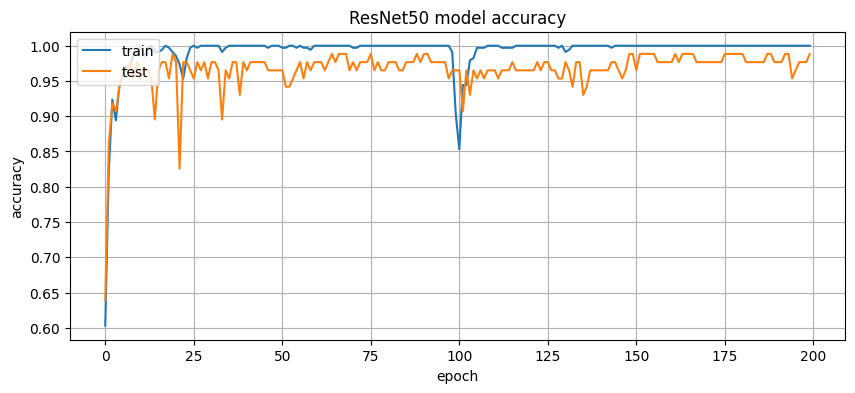

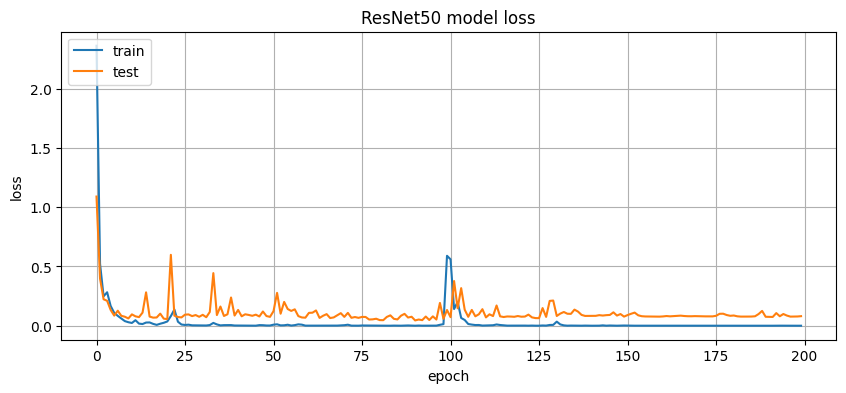

In [ ]:
import matplotlib.pyplot as plt

# Membuat plot akurasi model CNN
plt.figure(figsize=(10,4))
plt.plot(resnet50_hist7.history['accuracy'])
plt.plot(resnet50_hist7.history['val_accuracy'])
plt.title('ResNet50 model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

print()

# Membuat plot loss model CNN
plt.figure(figsize=(10,4))
plt.plot(resnet50_hist7.history['loss'])
plt.plot(resnet50_hist7.history['val_loss'])
plt.title('ResNet50 model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

In [ ]:
# Setelah pelatihan, memeriksa epoch terbaik dari log ModelCheckpoint
best_val_loss = model_resnet50_checkpoint.best
best_epoch = resnet50_hist7.history['val_loss'].index(best_val_loss) + 1 # +1 karena indeks dimulai dari 0

print(f"Epoch terbaik: {best_epoch}, Val_loss terbaik: {best_val_loss}")

Epoch terbaik: 91, Val_loss terbaik: 0.04474163427948952


### Pengujian Prediksi dengan Model Checkpoint

2/2 [==============================] - 2s 759ms/step


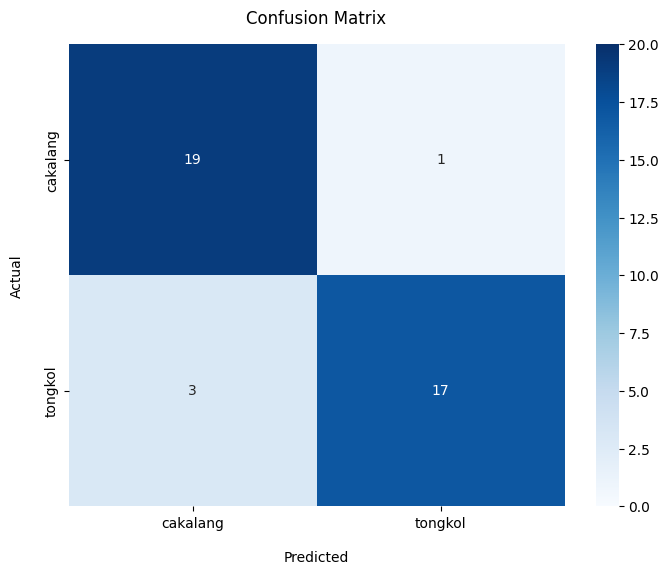

              precision    recall  f1-score   support

    cakalang       0.86      0.95      0.90        20
     tongkol       0.94      0.85      0.89        20

    accuracy                           0.90        40
   macro avg       0.90      0.90      0.90        40
weighted avg       0.90      0.90      0.90        40



In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model

# Muat model checkpoint
model_resnet50_checkpoint = load_model('/content/drive/MyDrive/Projek_2/model_checkpoint/model7_resnet50_GlobalMax_aug.h5')

# Evaluasi model terbaik pada data uji
predictions = model_resnet50_checkpoint.predict(resnet50_uji7)
predicted_classes = np.argmax(predictions, axis=1)

# Label sebenarnya dari dataset uji
true_classes = resnet50_uji7.classes
class_labels = list(resnet50_uji7.class_indices.keys())

# Hitung confusion matrix
confusion_mtx = confusion_matrix(true_classes, predicted_classes)

# Tampilkan confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels, cmap='Blues',vmin=0, vmax=20)
plt.xlabel('Predicted', labelpad=15)
plt.ylabel('Actual', labelpad=15)
plt.title('Confusion Matrix', pad=15)
plt.show()

# Mendapatkan metrik evaluasi
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

### Pengujian Prediksi dengan Model Pelatihan Keseluruhan (200 Epoch)

2/2 [==============================] - 1s 130ms/step


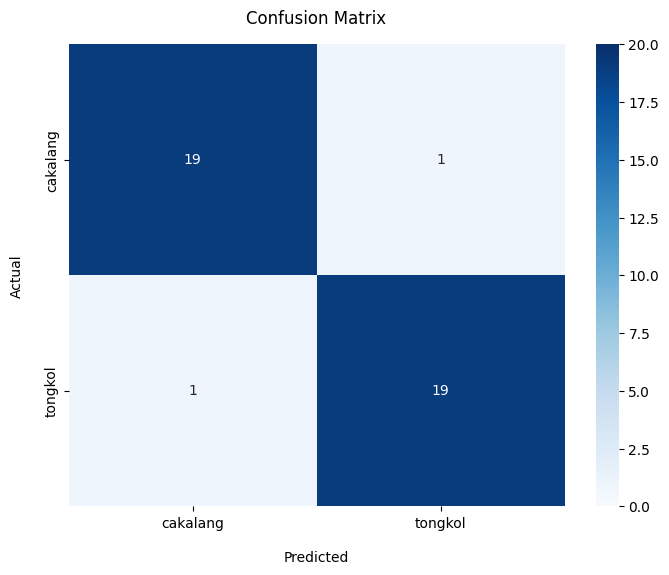

              precision    recall  f1-score   support

    cakalang       0.95      0.95      0.95        20
     tongkol       0.95      0.95      0.95        20

    accuracy                           0.95        40
   macro avg       0.95      0.95      0.95        40
weighted avg       0.95      0.95      0.95        40



In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluasi model pada data uji
predictions = model7_resnet50.predict(resnet50_uji7)
predicted_classes = np.argmax(predictions, axis=1)

# Label sebenarnya dari dataset uji
true_classes = resnet50_uji7.classes
class_labels = list(resnet50_uji7.class_indices.keys())

# Hitung confusion matrix
confusion_mtx = confusion_matrix(true_classes, predicted_classes)

# Tampilkan confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels, cmap='Blues',vmin=0, vmax=20)
plt.xlabel('Predicted', labelpad=15)
plt.ylabel('Actual', labelpad=15)
plt.title('Confusion Matrix', pad=15)
plt.show()

# Mendapatkan metrik evaluasi
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

In [ ]:
# menyimpan model pelatihan keseluruhan (200 epoch) dalam format .h5
model7_resnet50.save("/content/drive/MyDrive/Projek_2/model/model7_resnet50_GlobalMax_aug.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Kesimpulan Hasil

1. Percobaan yang dilakukan pada projek ini, mendapatkan model klasifikasi CNN terbaik yang dibangun menggunakan pendekatan transfer learning dengan memanfaatkan model pre-trained ResNet50.
2. Proses pelatihan pada model ini mendapatkan nilai loss train 0.000069, akurasi train 1.0000, loss validasi 0.0806, akurasi validasi 0.9884.
3. Setelah pelatihan, model ini diuji menggunakan data citra baru yang terdiri dari 20 citra perkelas. Model yang digunakan adalah model Pelatihan Keseluruhan (200 Epoch). Model ini mendapatkan nilai performa akurasi 0.95, rata-rata makro precision 0.95, rata-rata makro recall 0.95, rata-rata makro f1 score 0.95.